In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc

%matplotlib inline

In [2]:
rc['figure.figsize'] = 9, 5
rc['axes.titlesize'] = 18
rc['axes.labelsize'] = 14
rc['xtick.labelsize'] = 14
rc['ytick.labelsize'] = 14
rc['legend.fontsize'] = 12
rc['figure.facecolor'] = '#00000000'

sns.color_palette("husl", 10)
sns.set_style('darkgrid')

In [3]:
files = [i for i in os.listdir() if i[-3:] == "csv"]
print(f'Our data consists of {len(files)} which are {files}')

Our data consists of 12 which are ['author.csv', 'book.csv', 'generated_sales.csv', 'genre.csv', 'genre_sales.csv', 'member.csv', 'member_sales.csv', 'orderline.csv', 'orders.csv', 'orders_sales_purchases.csv', 'orders_sales_purchases_monthly.csv', 'orders_sales_purchases_weekly.csv']


In [4]:
orders = pd.read_csv("orders.csv")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   orderid   999 non-null    object
 1   memberid  999 non-null    object
 2   dates     999 non-null    object
 3   type      999 non-null    object
 4   details   999 non-null    object
dtypes: object(5)
memory usage: 39.1+ KB


In [5]:
orders.head()

,orderid,memberid,dates,type,details
0,O000000001,M000000002,2020-02-27,SEL,Television sign unit suffer century natural.
1,O000000002,M000000032,2020-08-29,SEL,Now throw avoid small interest person move.
2,O000000003,M000000013,2020-02-25,SEL,Possible civil wish candidate song.
3,O000000004,M000000031,2020-05-13,SEL,Animal design strong.
4,O000000005,M000000027,2020-04-20,SEL,Surface town agreement might rule bank.


In [6]:
orderline = pd.read_csv("orderline.csv")
orderline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   orderid   1294 non-null   object
 1   bookid    1294 non-null   object
 2   quantity  1294 non-null   int64 
 3   price     1294 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 40.6+ KB


In [7]:
orderline.head()

,orderid,bookid,quantity,price
0,O000000175,B000000114,1,3100
1,O000000436,B000000186,1,3800
2,O000000849,B000000025,2,5300
3,O000000852,B000000179,2,100
4,O000000777,B000000013,1,5500


In [8]:
for idx, orderid in orders['orderid'].iteritems():
    query = orderline.loc[orderline['orderid'] == orderid][['quantity', 'price']]
    sales = sum(query['price'] * query['quantity'])
    orders.at[idx, 'sales'] = sales

In [9]:
orders.head()

,orderid,memberid,dates,type,details,sales
0,O000000001,M000000002,2020-02-27,SEL,Television sign unit suffer century natural.,15000.0
1,O000000002,M000000032,2020-08-29,SEL,Now throw avoid small interest person move.,4700.0
2,O000000003,M000000013,2020-02-25,SEL,Possible civil wish candidate song.,2800.0
3,O000000004,M000000031,2020-05-13,SEL,Animal design strong.,1700.0
4,O000000005,M000000027,2020-04-20,SEL,Surface town agreement might rule bank.,0.0


In [10]:
orders['dates'] = pd.to_datetime(orders['dates'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   orderid   999 non-null    object        
 1   memberid  999 non-null    object        
 2   dates     999 non-null    datetime64[ns]
 3   type      999 non-null    object        
 4   details   999 non-null    object        
 5   sales     999 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


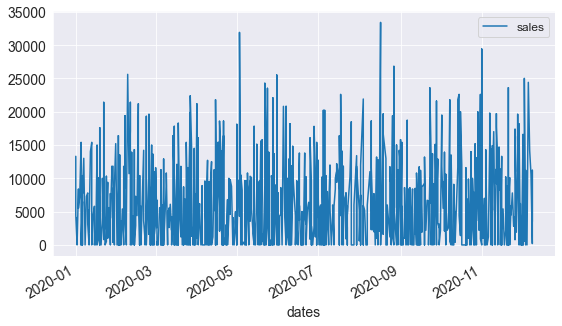

In [12]:
orders.plot(x='dates', y='sales', subplots=True)
plt.show()

In [13]:
sales_df = orders.loc[orders['type'] == 'SEL']
sales_df.head()

,orderid,memberid,dates,type,details,sales
0,O000000001,M000000002,2020-02-27,SEL,Television sign unit suffer century natural.,15000.0
1,O000000002,M000000032,2020-08-29,SEL,Now throw avoid small interest person move.,4700.0
2,O000000003,M000000013,2020-02-25,SEL,Possible civil wish candidate song.,2800.0
3,O000000004,M000000031,2020-05-13,SEL,Animal design strong.,1700.0
4,O000000005,M000000027,2020-04-20,SEL,Surface town agreement might rule bank.,0.0


<AxesSubplot:xlabel='dates'>

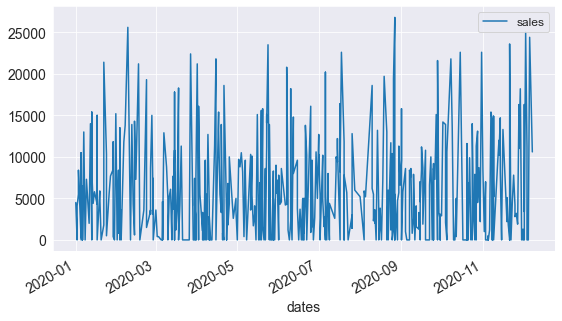

In [14]:
sales_df.plot(x='dates', y='sales')

In [15]:
purchases_df = orders.loc[orders['type'] == 'PUR']
purchases_df.head()

,orderid,memberid,dates,type,details,sales
6,O000000007,M000000029,2020-11-29,PUR,Worry far style everything.,0.0
8,O000000009,M000000038,2020-06-05,PUR,Crime.,20800.0
9,O000000010,M000000035,2020-07-13,PUR,Couple himself mouth world main player short s...,0.0
10,O000000011,M000000017,2020-04-14,PUR,Often far agency.,5400.0
13,O000000014,M000000009,2020-07-12,PUR,Son anything seek science ever outside write pay.,6000.0


<AxesSubplot:xlabel='dates'>

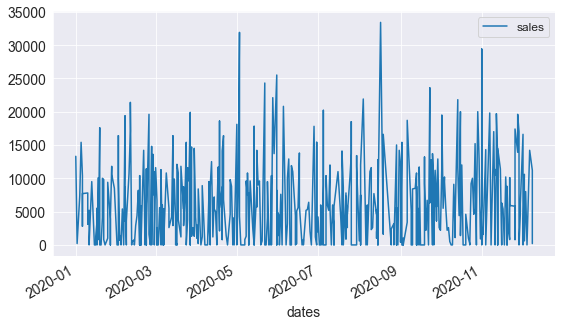

In [16]:
purchases_df.plot(x='dates', y='sales')

In [17]:
purchases_df = purchases_df.sort_values(['dates'])
purchases_df.set_index('dates')
sales_df = sales_df.sort_values(['dates'])
purchases_df.set_index('dates')

,orderid,memberid,type,details,sales
dates,,,,,
2020-01-01,O000000835,M000000022,PUR,Lay study why police dream position.,13300.0
2020-01-02,O000000104,M000000004,PUR,Nation election detail evening agreement blue.,200.0
2020-01-04,O000000688,M000000026,PUR,Cover car political inside free life argue win...,7400.0
2020-01-05,O000000470,M000000043,PUR,So.,15400.0
2020-01-06,O000000507,M000000032,PUR,Bank.,10400.0
...,...,...,...,...,...
2020-12-09,O000000369,M000000007,PUR,Likely blue exactly.,11200.0
2020-12-09,O000000602,M000000026,PUR,Impact our fight season energy beat.,6200.0
2020-12-09,O000000631,M000000019,PUR,Front wait age.,3500.0


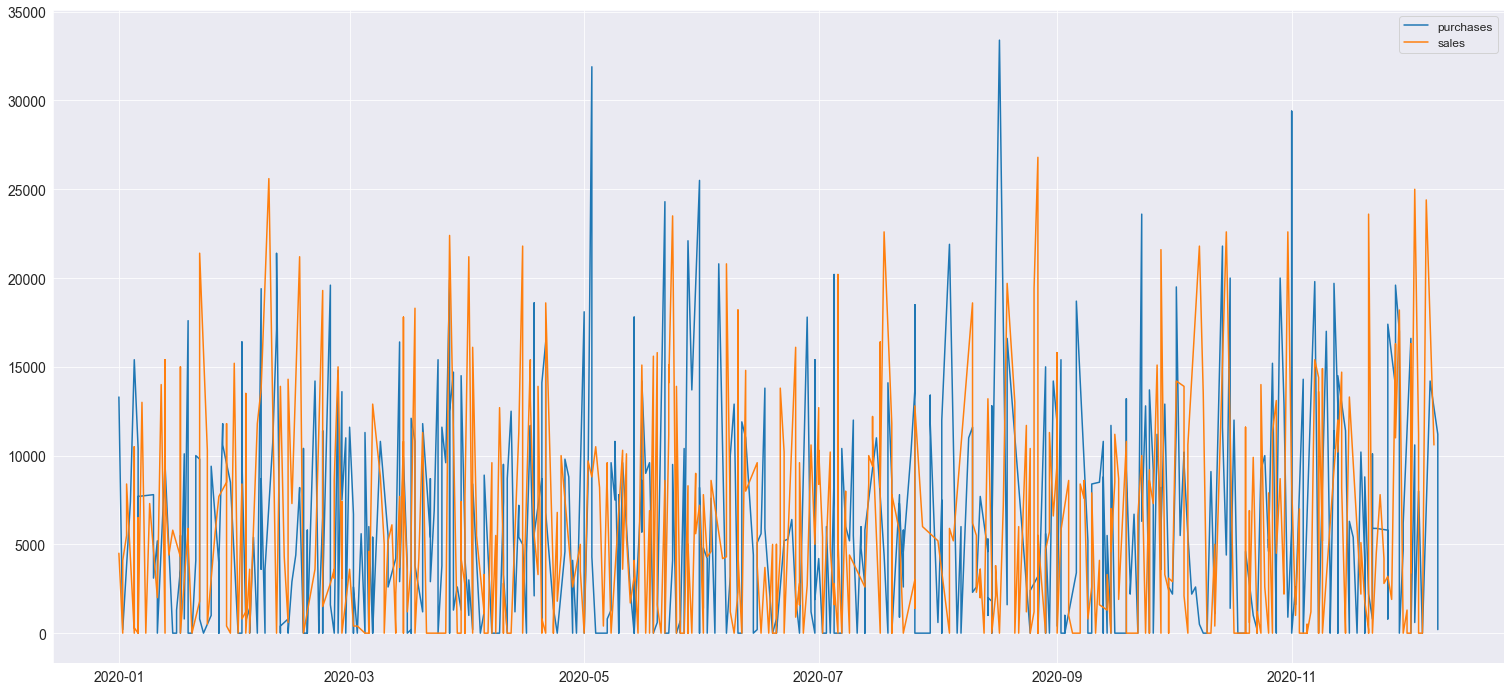

In [18]:
plt.figure(figsize=(26, 12))
colors = ['gold', 'lightskyblue']
plt.plot(purchases_df['dates'], purchases_df['sales'], label='purchases')
plt.plot(sales_df['dates'], sales_df['sales'], label='sales')
plt.legend()
plt.show()

In [19]:
weekly = pd.read_csv('orders_sales_purchases_weekly.csv', index_col=['year', 'weekly'])
weekly.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, (2020, 1) to (2020, 50)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   numberofsales      50 non-null     int64
 1   totalsales         50 non-null     int64
 2   numberofpurchases  50 non-null     int64
 3   totalpurchases     50 non-null     int64
dtypes: int64(4)
memory usage: 4.7 KB


<AxesSubplot:xlabel='year,weekly'>

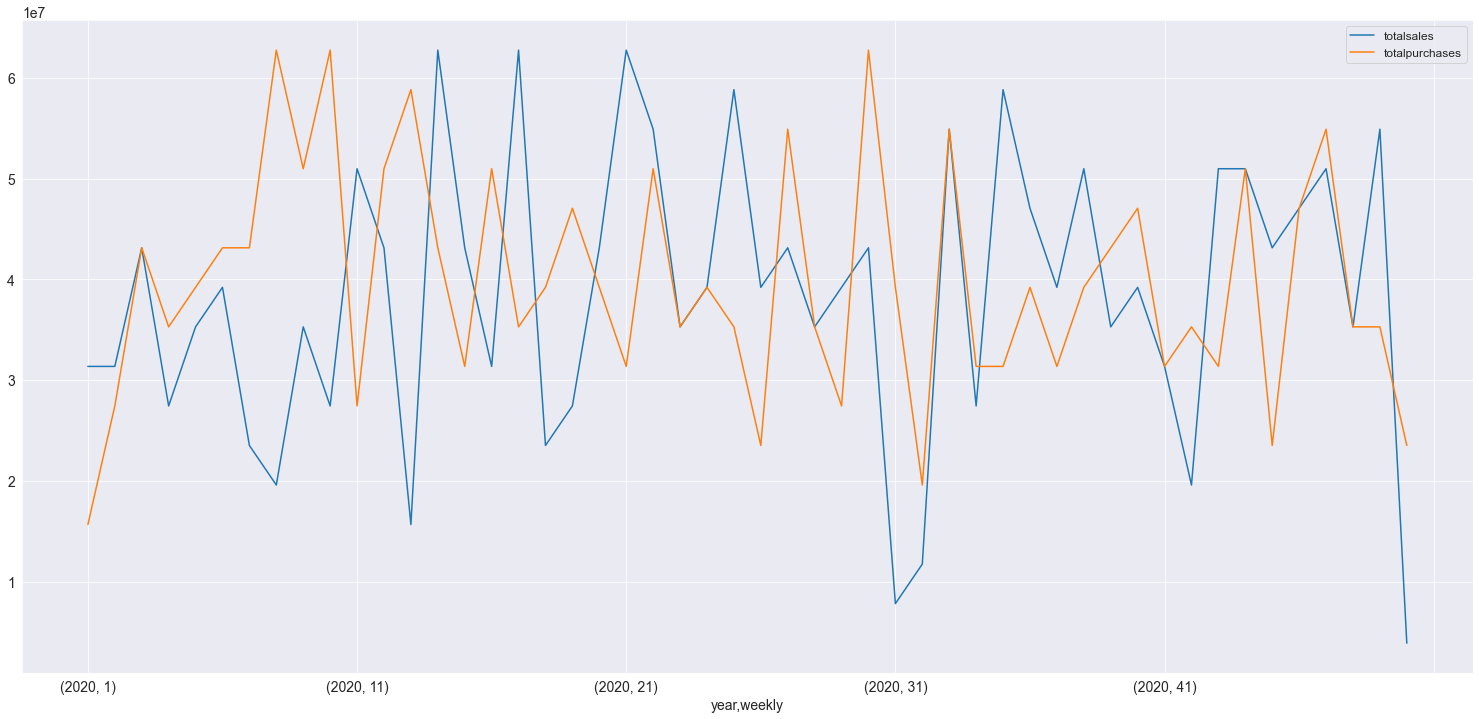

In [20]:
weekly.plot(y=['totalsales', 'totalpurchases'], figsize=(26, 12))

In [21]:
monthly = pd.read_csv('orders_sales_purchases_monthly.csv', index_col=['year', 'monthly'])
monthly .info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, (2020, 1) to (2020, 12)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   numberofsales      12 non-null     int64
 1   totalsales         12 non-null     int64
 2   numberofpurchases  12 non-null     int64
 3   totalpurchases     12 non-null     int64
dtypes: int64(4)
memory usage: 1021.0 bytes


<AxesSubplot:xlabel='year,monthly'>

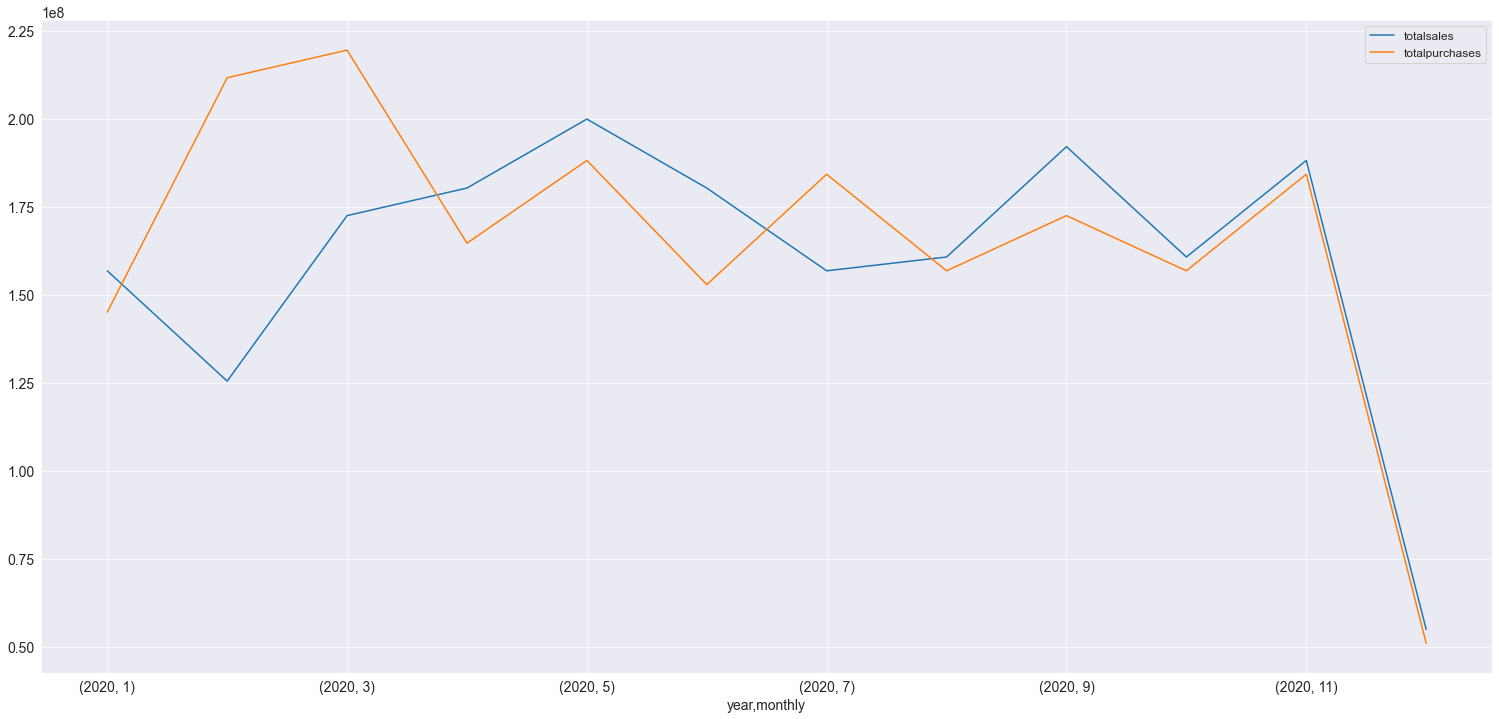

In [22]:
monthly.plot(y=['totalsales', 'totalpurchases'], figsize=(26, 12))

In [23]:
genre_sales = pd.read_csv('genre_sales.csv')
genre_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genres             21 non-null     object
 1   numberofsales      21 non-null     int64 
 2   totalsales         21 non-null     int64 
 3   numberofpurchases  21 non-null     int64 
 4   totalpurchases     21 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 968.0+ bytes


<AxesSubplot:>

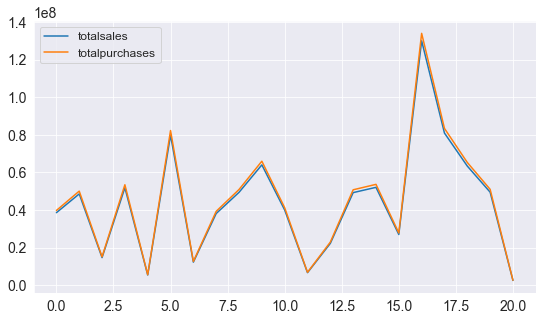

In [24]:
genre_sales.plot(y=['totalsales', 'totalpurchases'])

In [25]:
genre_sales.head()

,genres,numberofsales,totalsales,numberofpurchases,totalpurchases
0,Adventure,17712,38572800,18252,39748800
1,Art,13284,48560400,13689,50040900
2,Contemporary,5412,14661600,5577,15108600
3,Cooking,21156,51856800,21801,53437800
4,Development,2460,5412000,2535,5577000


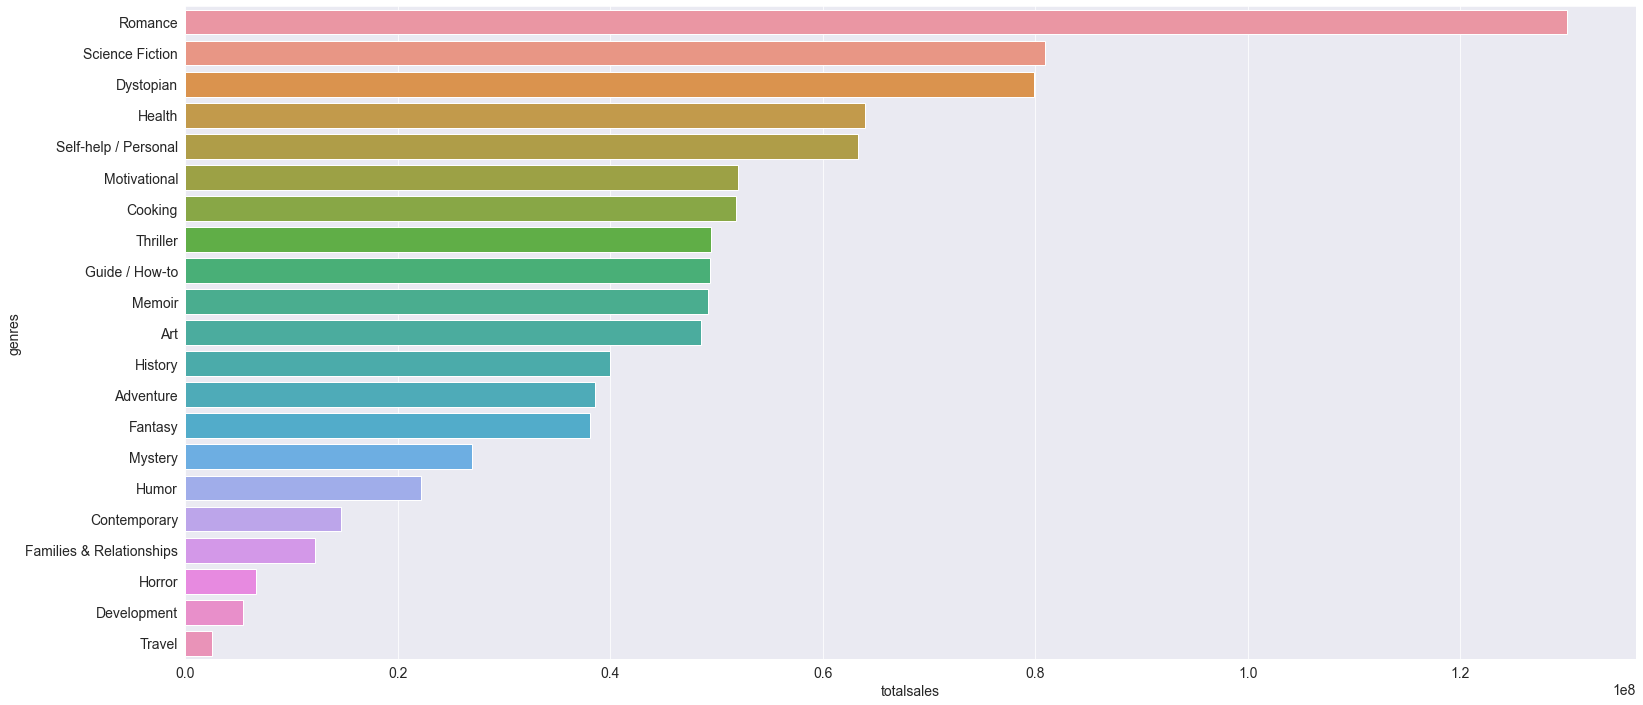

In [26]:
plt.figure(figsize=(26, 12))
plot = sns.barplot(data=genre_sales.sort_values(['totalsales'], ascending=False),
                   y='genres', x='totalsales')

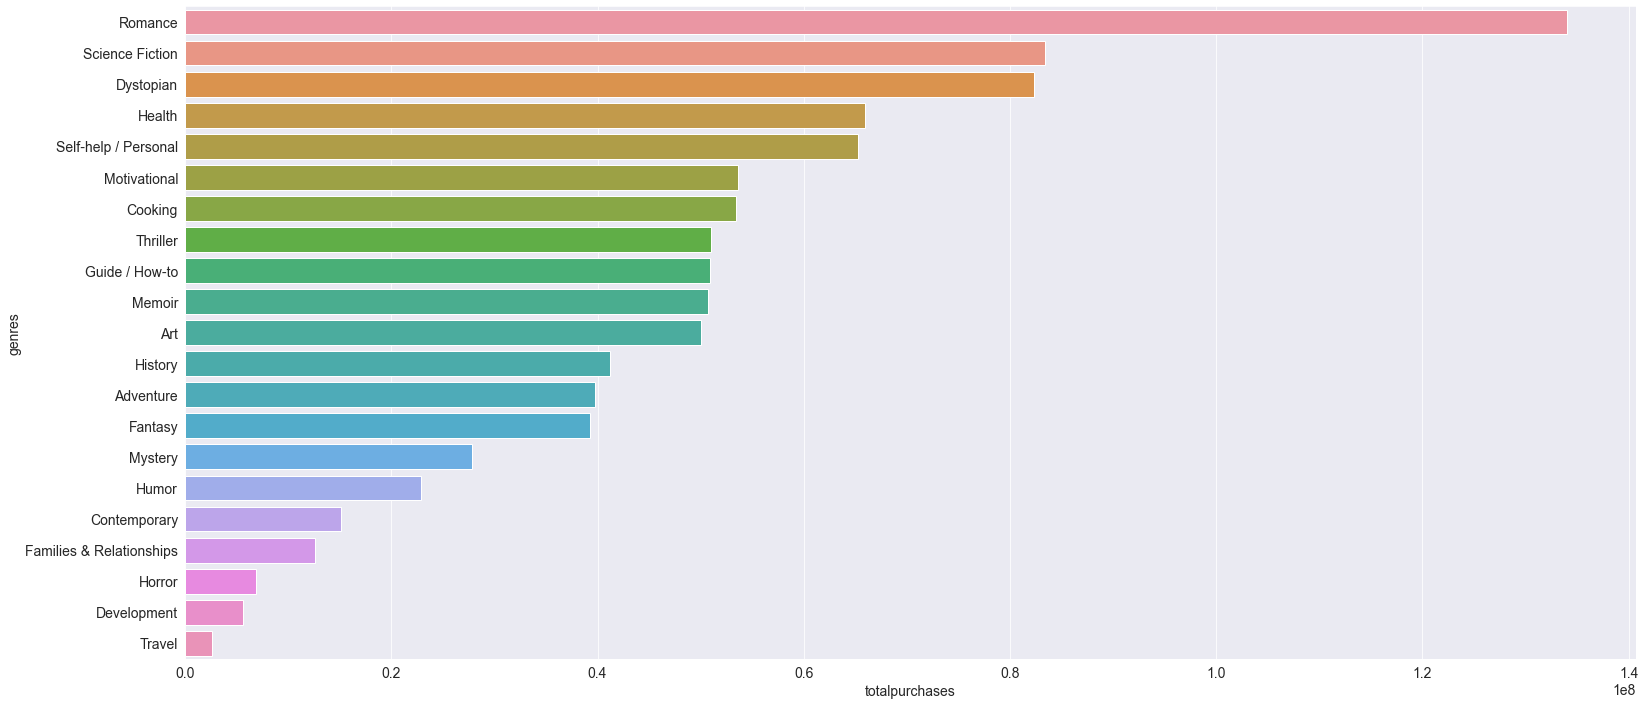

In [27]:
plt.figure(figsize=(26, 12))
plot = sns.barplot(data=genre_sales.sort_values(['totalpurchases'], ascending=False),
                   y='genres', x='totalpurchases')

In [28]:
member_sales = pd.read_csv('member_sales.csv')
member_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   membername         49 non-null     object
 1   sex                49 non-null     object
 2   case               49 non-null     object
 3   numberofsales      49 non-null     int64 
 4   totalgained        49 non-null     int64 
 5   numberofpurchases  49 non-null     int64 
 6   totalspent         49 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.8+ KB


In [29]:
member_sales.head()

,membername,sex,case,numberofsales,totalgained,numberofpurchases,totalspent
0,Sandra Brown,FE,adult,16,50900,7,20000
1,Alexandra Sanchez,MA,adult,4,15700,25,67500
2,Eric Francis,OT,adult,21,64500,8,17500
3,Olivia Burton,OT,adult,23,67100,6,16000
4,Sarah Rodriguez,MA,elder,14,44400,25,76100


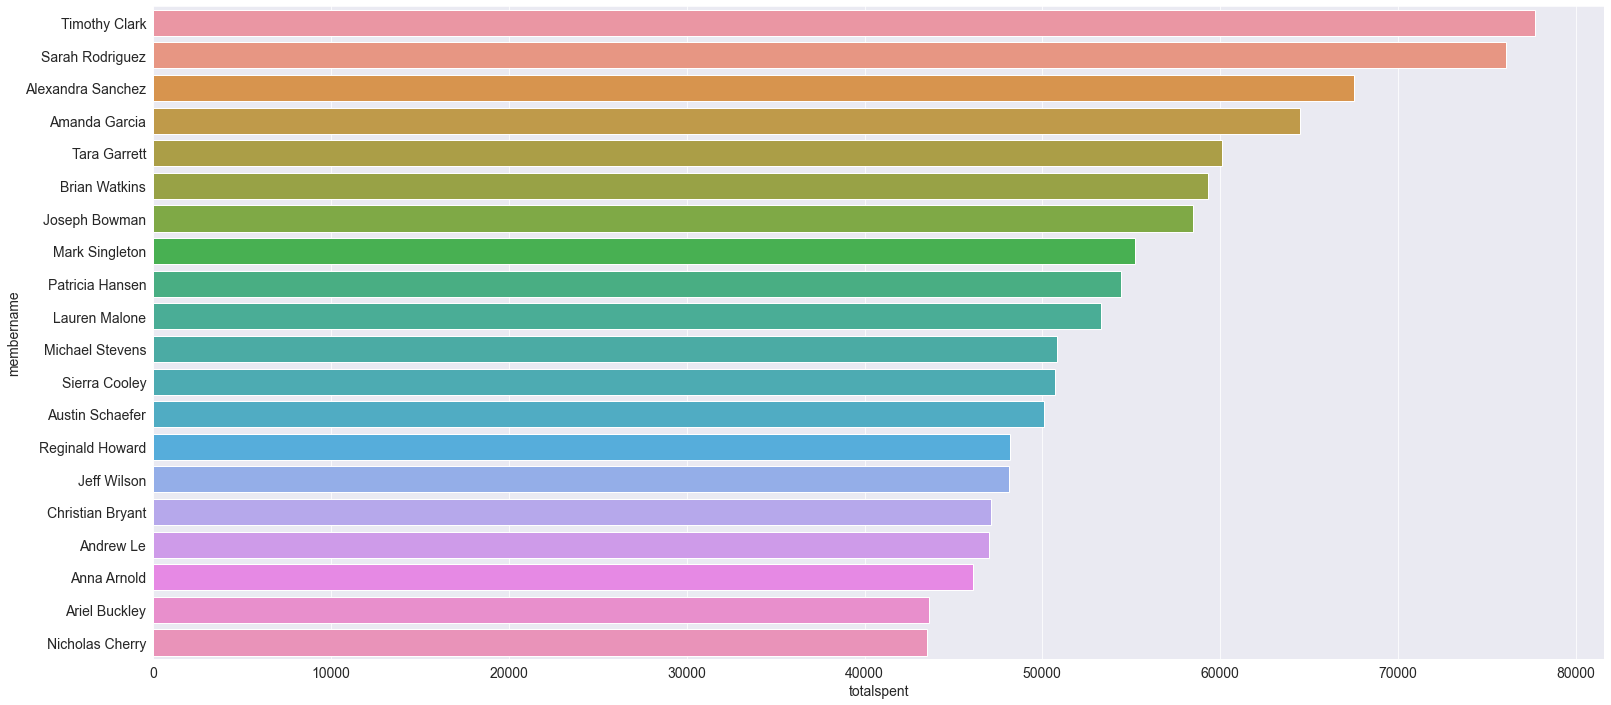

In [30]:
plt.figure(figsize=(26, 12))
plot = sns.barplot(data=member_sales.sort_values(['totalspent'], ascending=False).head(20),
                   y='membername', x='totalspent')

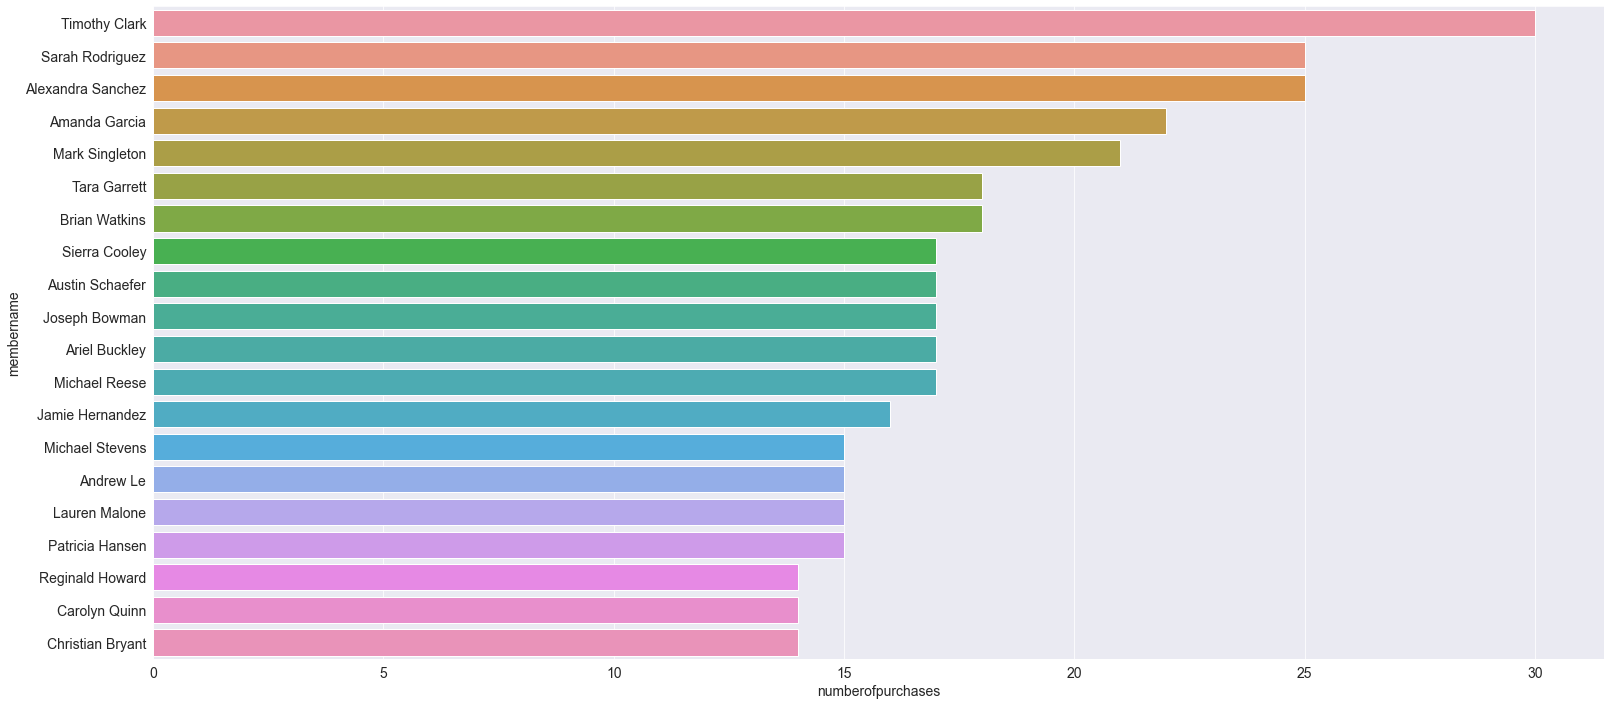

In [31]:
plt.figure(figsize=(26, 12))
plot = sns.barplot(data=member_sales.sort_values(['numberofpurchases'], ascending=False).head(20),
                   y='membername', x='numberofpurchases')

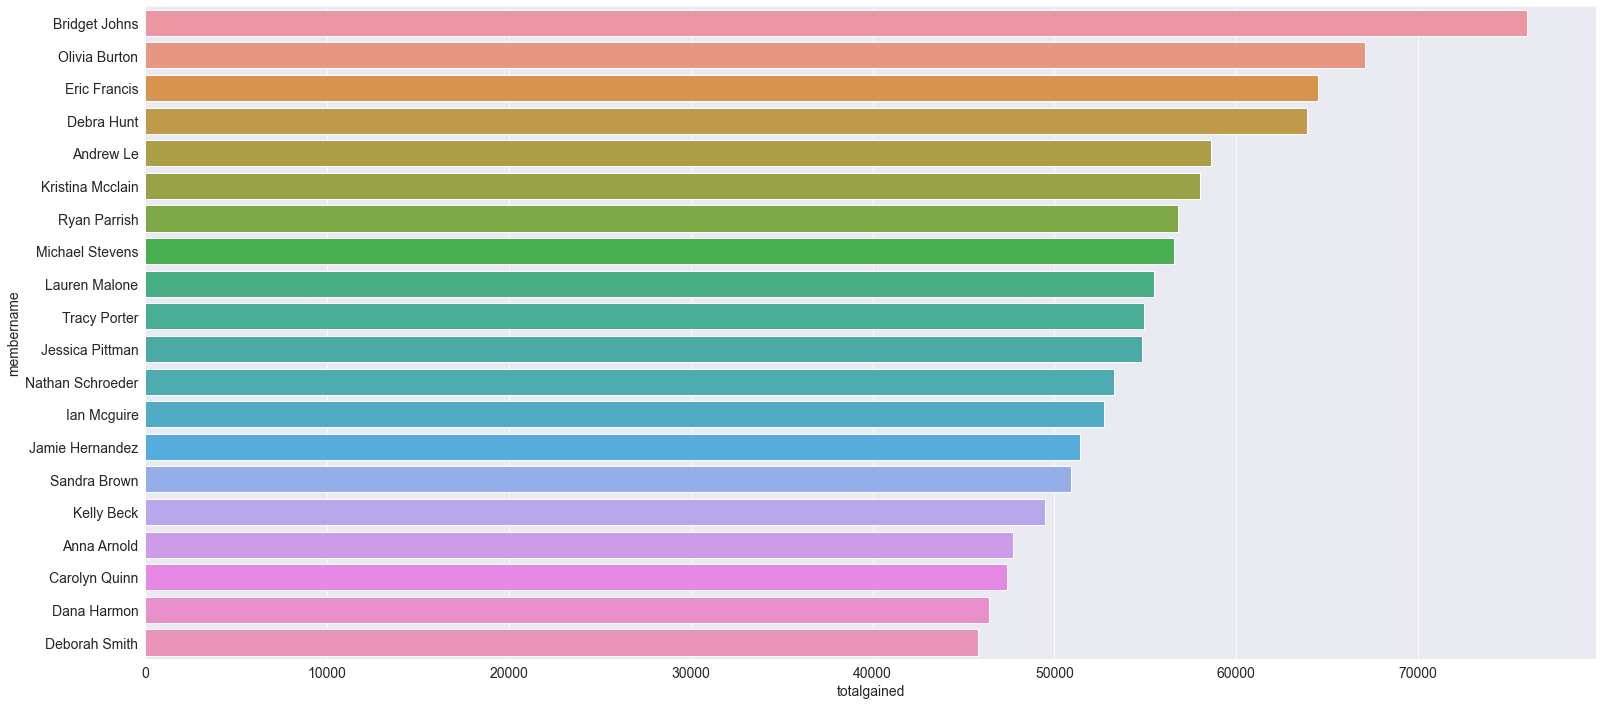

In [32]:
plt.figure(figsize=(26, 12))
plot = sns.barplot(data=member_sales.sort_values(['totalgained'], ascending=False).head(20),
                   y='membername', x='totalgained')

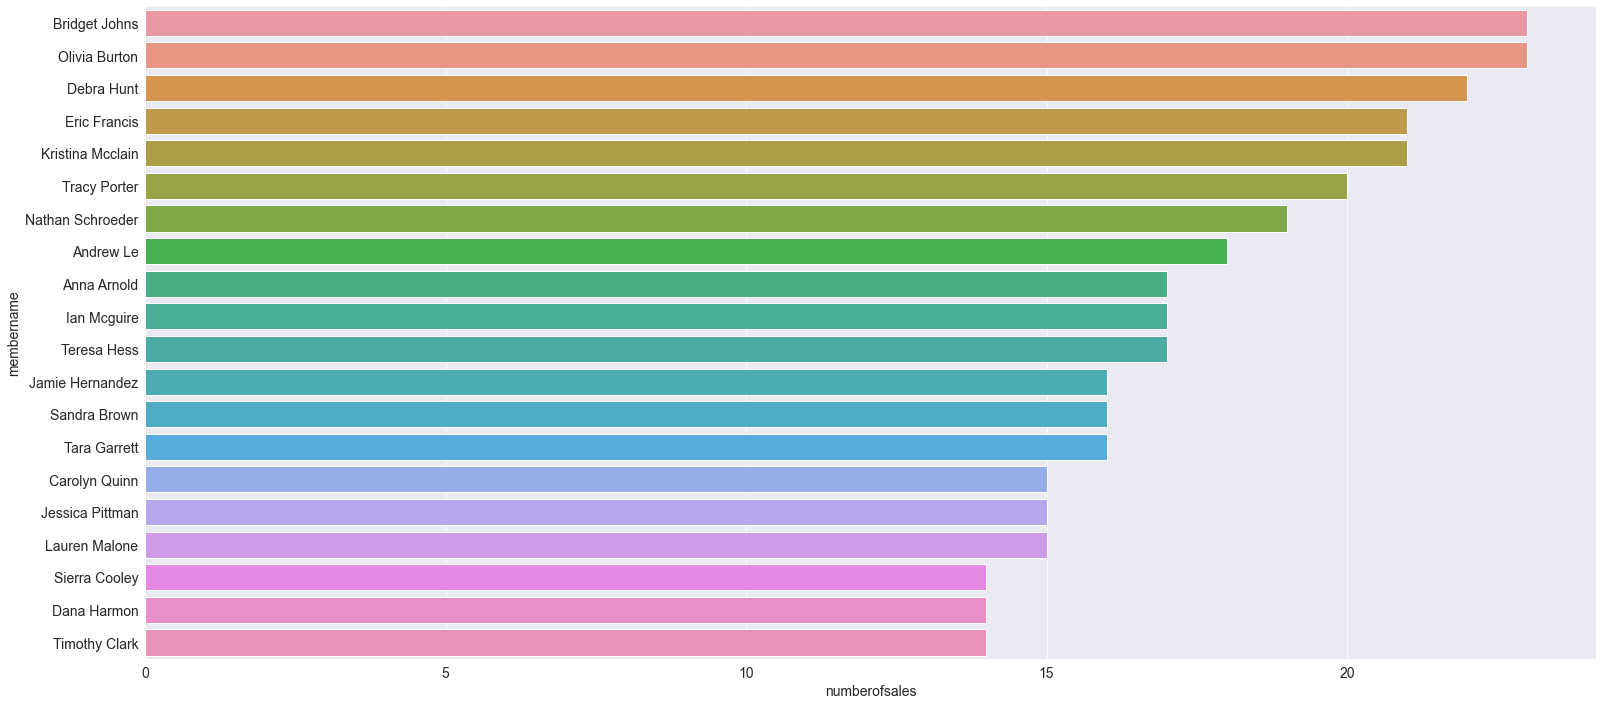

In [33]:
plt.figure(figsize=(26, 12))
plot = sns.barplot(data=member_sales.sort_values(['numberofsales'], ascending=False).head(20),
                   y='membername', x='numberofsales')

In [34]:
most_sold = member_sales.sort_values(['totalgained'], ascending=False).head(20)['membername']
most_purchases = member_sales.sort_values(['totalspent'], ascending=False).head(20)['membername']
overlap = set(most_sold) & set(most_purchases)
overlap

{'Andrew Le', 'Anna Arnold', 'Lauren Malone', 'Michael Stevens'}

In [35]:
purchases_df.head()

,orderid,memberid,dates,type,details,sales
834,O000000835,M000000022,2020-01-01,PUR,Lay study why police dream position.,13300.0
103,O000000104,M000000004,2020-01-02,PUR,Nation election detail evening agreement blue.,200.0
687,O000000688,M000000026,2020-01-04,PUR,Cover car political inside free life argue win...,7400.0
469,O000000470,M000000043,2020-01-05,PUR,So.,15400.0
506,O000000507,M000000032,2020-01-06,PUR,Bank.,10400.0


In [36]:
rfm_m = purchases_df.groupby('memberid')['sales'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,memberid,sales
0,M000000001,67200.0
1,M000000002,15700.0
2,M000000003,107600.0
3,M000000004,110200.0
4,M000000005,66300.0


In [37]:
rfm_f = purchases_df.groupby('memberid')['orderid'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['memberid', 'frequency']
rfm_f.head()

,memberid,frequency
0,M000000001,13
1,M000000002,6
2,M000000003,11
3,M000000004,15
4,M000000005,6


In [38]:
rfm = pd.merge(rfm_m, rfm_f, on='memberid', how='inner')
rfm.head()

,memberid,sales,frequency
0,M000000001,67200.0,13
1,M000000002,15700.0,6
2,M000000003,107600.0,11
3,M000000004,110200.0,15
4,M000000005,66300.0,6


In [39]:
max_date = max(purchases_df['dates'])
max_date

Timestamp('2020-12-09 00:00:00')

In [40]:
purchases_df['diff'] = max_date - purchases_df['dates']
purchases_df.head()

,orderid,memberid,dates,type,details,sales,diff
834,O000000835,M000000022,2020-01-01,PUR,Lay study why police dream position.,13300.0,343 days
103,O000000104,M000000004,2020-01-02,PUR,Nation election detail evening agreement blue.,200.0,342 days
687,O000000688,M000000026,2020-01-04,PUR,Cover car political inside free life argue win...,7400.0,340 days
469,O000000470,M000000043,2020-01-05,PUR,So.,15400.0,339 days
506,O000000507,M000000032,2020-01-06,PUR,Bank.,10400.0,338 days


In [41]:
rfm_p = purchases_df.groupby('memberid')['diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p['diff'] = rfm_p['diff'].dt.days
rfm_p.head()

,memberid,diff
0,M000000001,75
1,M000000002,44
2,M000000003,46
3,M000000004,45
4,M000000005,91


In [42]:
rfm = pd.merge(rfm, rfm_p, on='memberid', how='inner')
rfm.columns = ['memberid', 'sales', 'frequency', 'recency']
rfm.head()

,memberid,sales,frequency,recency
0,M000000001,67200.0,13,75
1,M000000002,15700.0,6,44
2,M000000003,107600.0,11,46
3,M000000004,110200.0,15,45
4,M000000005,66300.0,6,91


In [43]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   memberid   49 non-null     object 
 1   sales      49 non-null     float64
 2   frequency  49 non-null     int64  
 3   recency    49 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ KB


Text(0.5, 0, 'Attributes')

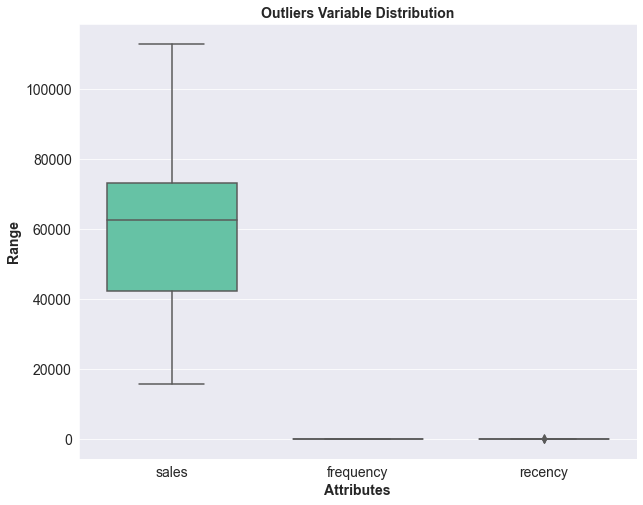

In [44]:

attributes = ['sales','frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [46]:
# Removing (statistical) outliers for Amount
Q1 = rfm.sales.quantile(0.05)
Q3 = rfm.sales.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.sales >= Q1 - 1.5*IQR) & (rfm.sales <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

In [47]:
# Rescaling the attributes

rfm_df = rfm[['sales', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(49, 3)

In [48]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['sales', 'frequency', 'recency']
rfm_df_scaled.head()

,sales,frequency,recency
0,0.237056,0.896530,0.922848
1,-1.928807,-1.468931,0.163061
2,1.936103,0.220684,0.212080
3,2.045447,1.572376,0.187571
4,0.199206,-1.468931,1.314996


In [49]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [50]:
kmeans.labels_

array([1, 3, 0, 0, 2, 3, 0, 1, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2,
       1, 3, 1, 0, 3])

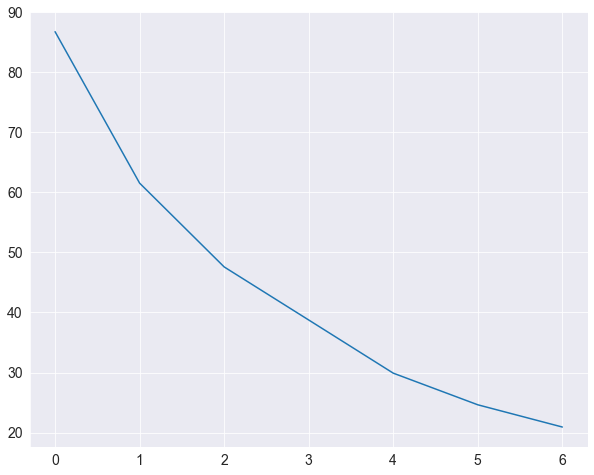

In [51]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [52]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [53]:
kmeans.labels_

array([0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 1])

In [54]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,memberid,sales,frequency,recency,Cluster_Id
0,M000000001,67200.0,13,75,0
1,M000000002,15700.0,6,44,1
2,M000000003,107600.0,11,46,0
3,M000000004,110200.0,15,45,0
4,M000000005,66300.0,6,91,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='sales'>

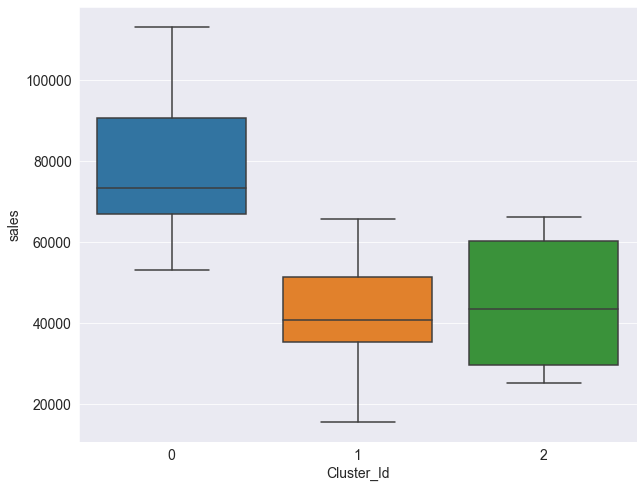

In [55]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='sales', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='frequency'>

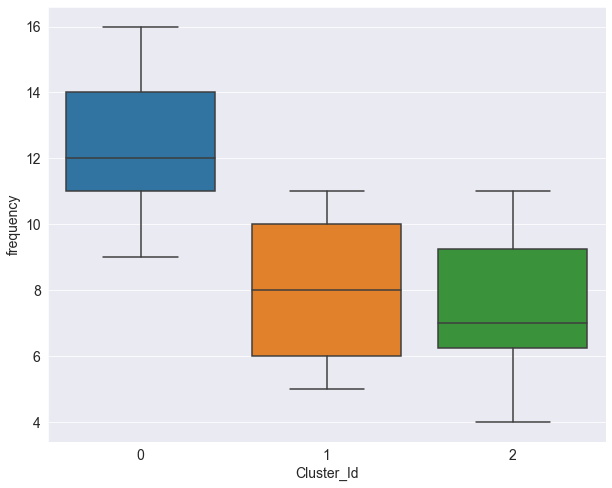

In [56]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='recency'>

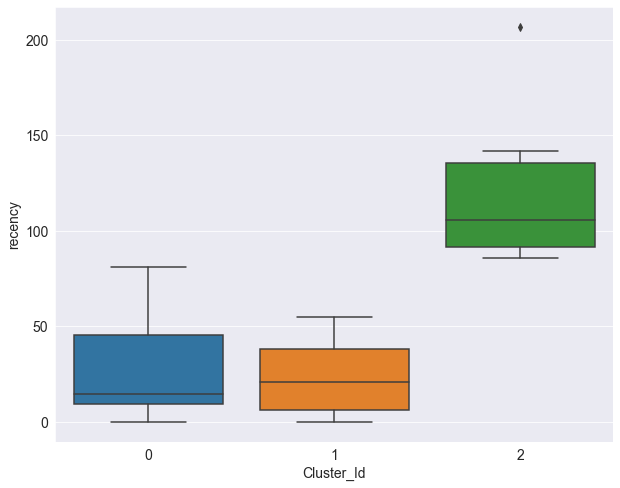

In [57]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='recency', data=rfm)

In [58]:
purchases_df = purchases_df.set_index('dates')
purchases_df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-06', '2020-01-06', '2020-01-10',
               '2020-01-10', '2020-01-11',
               ...
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-05',
               '2020-12-07', '2020-12-09', '2020-12-09', '2020-12-09',
               '2020-12-09', '2020-12-09'],
              dtype='datetime64[ns]', name='dates', length=507, freq=None)

In [59]:
y = purchases_df['sales'].resample('W-MON').mean()
y.sort_index(inplace=True)

In [61]:
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
import statsmodels.api as sm

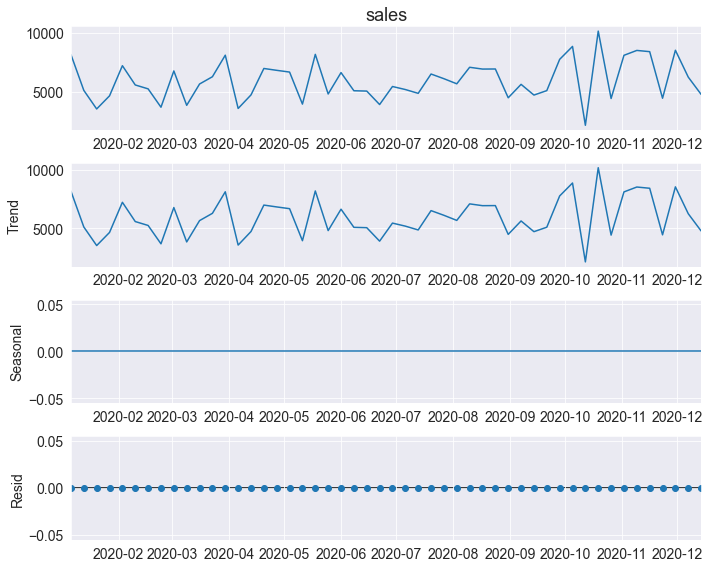

In [62]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq', period=1)
fig = decomposition.plot()
plt.show()

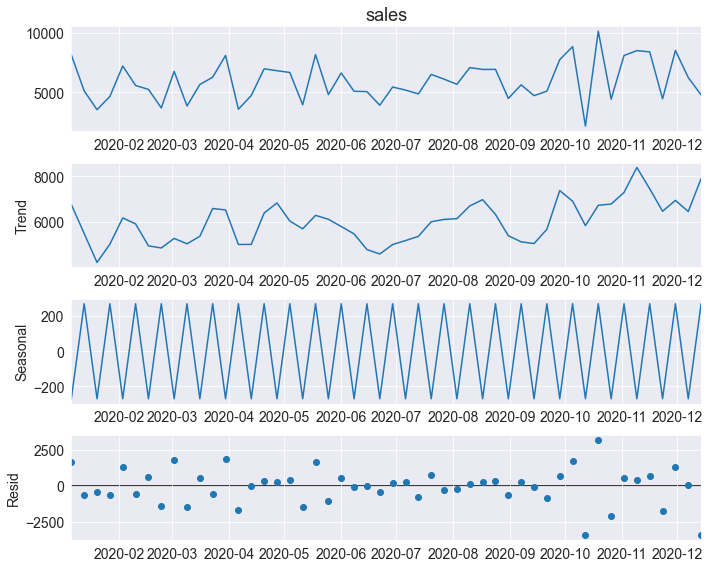

In [63]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq', period=2)
fig = decomposition.plot()
plt.show()

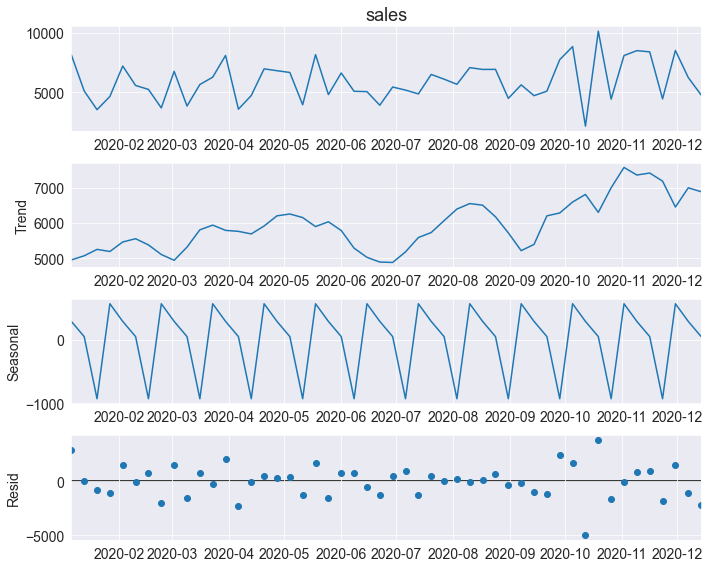

In [64]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq', period=4)
fig = decomposition.plot()
plt.show()

In [65]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [66]:
min_aic = float('inf')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aic < min_aic:
                min_aic = results.aic
                min_param = param
                min_param_seasonal = param_seasonal
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:995.8065266364233
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:740.340919044501
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:672.1288593178505
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1083.612654403839
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:690.8648952736033
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:675.1490654248948
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:473.04659761515427


C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:992.8792853495306
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:955.8195095211227
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:700.6114977885923
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:653.1972112010633


C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1050.4403365496594
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:687.4681444222107
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:653.9205408367562
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:473.84463464864706


C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1165.071087363295
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:894.2310281006668
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:676.0977598699682
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:690.3205284490667
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1051.4381375032945
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:696.5378564022054
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:677.3050605262789
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:475.18468299353407
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:455.2110660190434
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:837.0095356424802
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:629.2209665242818
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:639.9132998289228
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1925.639483965168
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:664.8138493979654
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:631.1874077262323
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:453.7090239886264
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:419.1554539829428
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:912.2525700563295
ARIMA(1,

C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1145.469286326442
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:671.1953741947724
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:656.9151830944091
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:453.7905213896117


C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:923.8069125363701
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:871.514105341967
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:655.1490090380315
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:667.5793983481303


C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:971.9569507313183
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:655.2398717687873
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:657.1473317511943
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:446.38712121600724
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:448.1698694759249
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:834.1281064260314
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:624.4868672989576
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:634.2373184152927


C:\Users\trung\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:961.6255716277137
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:642.3151988940699
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:626.4712493149984
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:432.40391435910277
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:417.1258725859784


In [67]:
print('ARIMA{}x{}12 - AIC:{}'.format(min_param, min_param_seasonal, min_aic))

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:417.1258725859784


In [68]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False,
                               )
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3579      0.168     -2.129      0.033      -0.687      -0.028
ma.L1         -0.8958      0.169     -5.302      0.000      -1.227      -0.565
ar.S.L12       0.4391      0.427      1.027      0.304      -0.399       1.277
ma.S.L12      -0.9992      0.298     -3.357      0.001      -1.583      -0.416
sigma2       2.68e+06   1.11e-07    2.4e+13      0.000    2.68e+06    2.68e+06


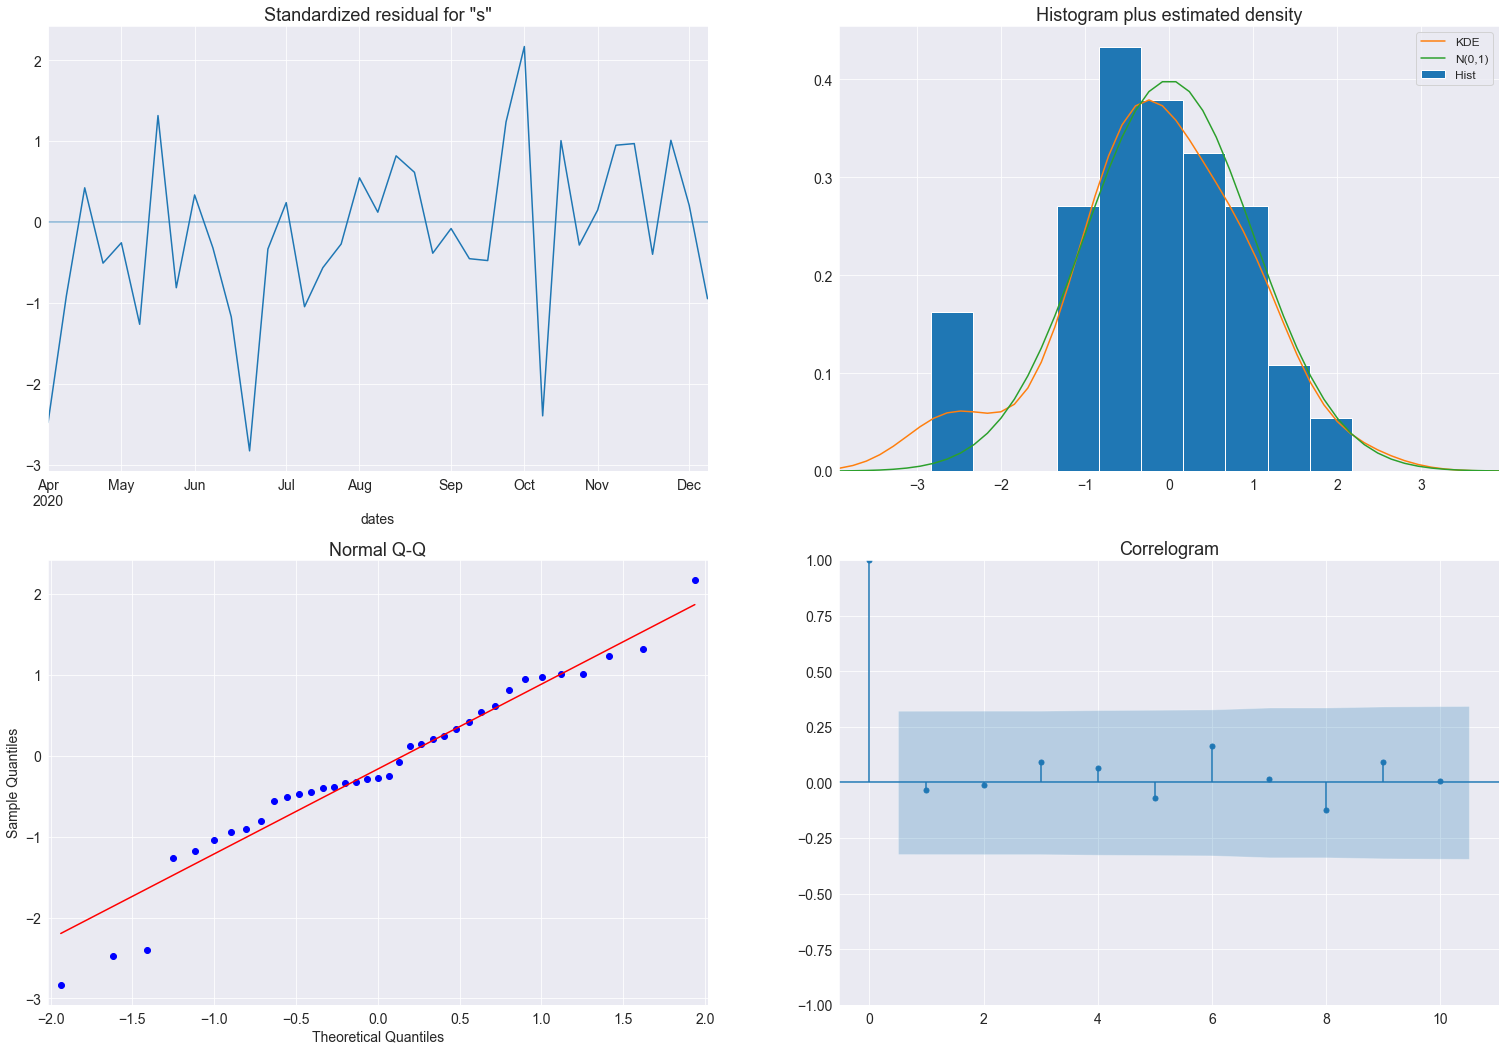

In [88]:
results.plot_diagnostics(figsize=(26, 18))
plt.show()

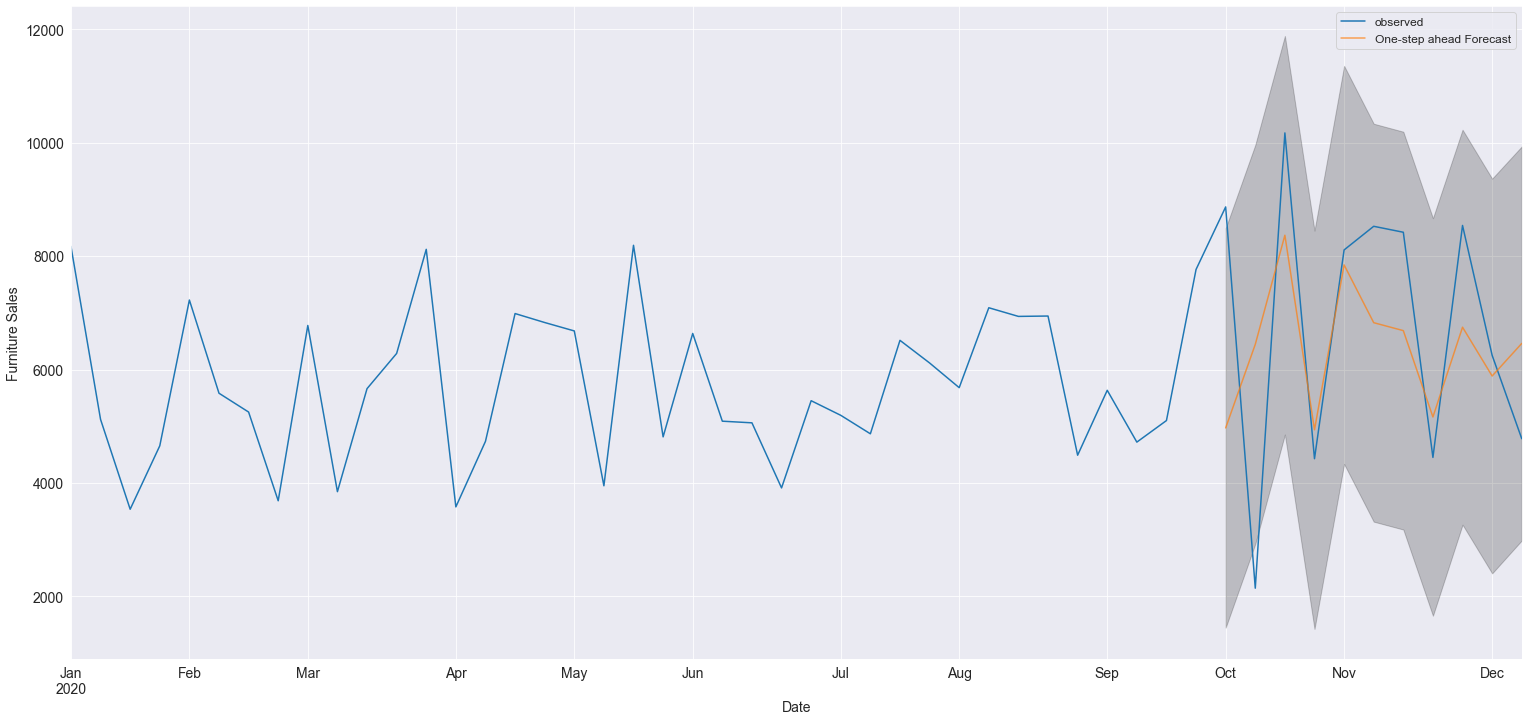

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2020-10-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(26, 12))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [71]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-10-05':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4529266.77


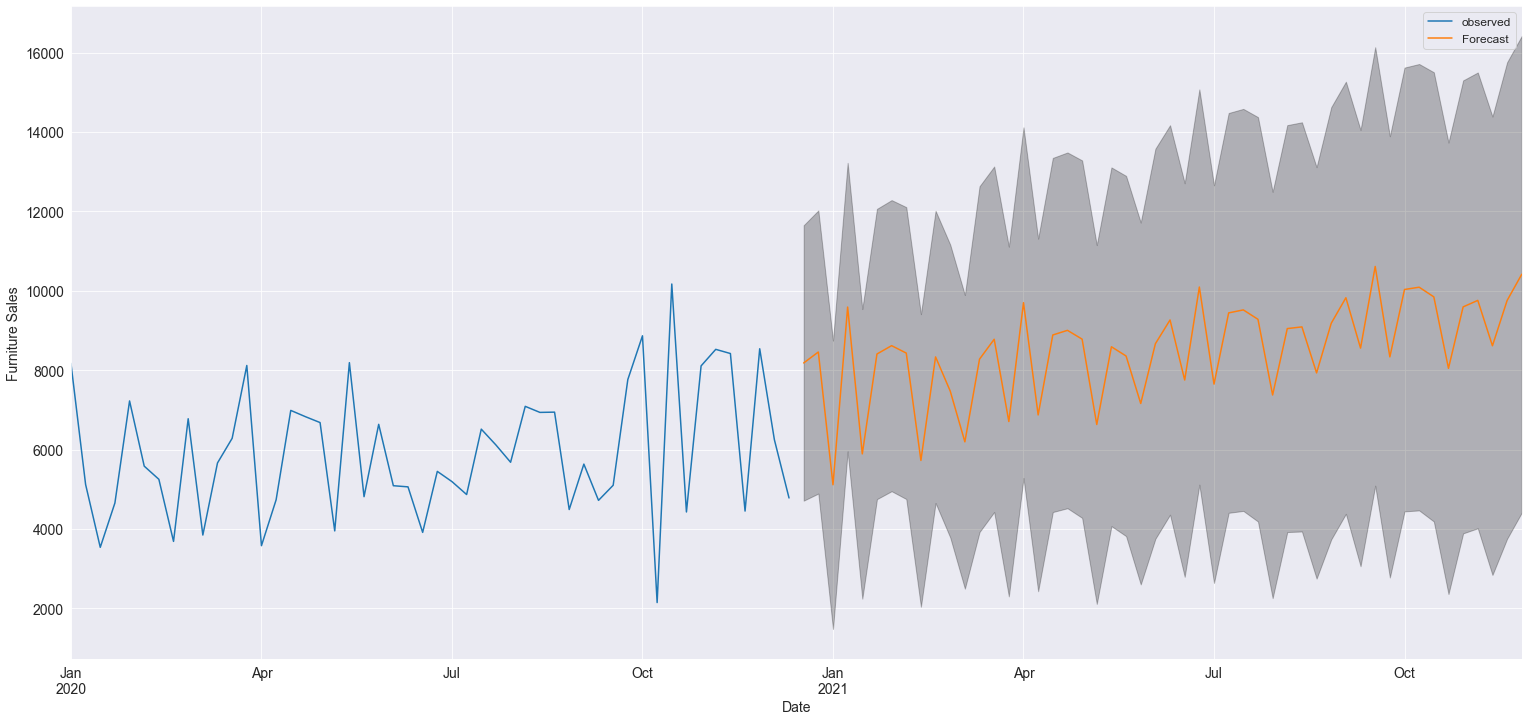

In [72]:
plt.figure(figsize=(26, 12))
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(26, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [73]:
member_sales.head()

,membername,sex,case,numberofsales,totalgained,numberofpurchases,totalspent
0,Sandra Brown,FE,adult,16,50900,7,20000
1,Alexandra Sanchez,MA,adult,4,15700,25,67500
2,Eric Francis,OT,adult,21,64500,8,17500
3,Olivia Burton,OT,adult,23,67100,6,16000
4,Sarah Rodriguez,MA,elder,14,44400,25,76100


In [74]:
sales_data = pd.read_csv('generated_sales.csv')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   condition  333 non-null    object
 1   orderid    333 non-null    object
 2   memberid   333 non-null    object
 3   sex        333 non-null    object
 4   age        333 non-null    object
 5   bookid     333 non-null    object
 6   genre      333 non-null    object
 7   quantity   333 non-null    int64 
 8   total      333 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 23.5+ KB


In [75]:
sales_data.head()

,condition,orderid,memberid,sex,age,bookid,genre,quantity,total
0,C,O000000009,M000000038,MA,adult,B000000079,Health,1,5300
1,B,O000000011,M000000017,OT,elder,B000000049,Romance,1,5400
2,B,O000000014,M000000009,FE,teen,B000000019,Art,2,6000
3,A,O000000017,M000000029,MA,adult,B000000042,Cooking,1,500
4,A,O000000017,M000000029,MA,adult,B000000138,Fantasy,2,10600


In [76]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [77]:
le = preprocessing.LabelEncoder()
sales_data['condition'] = le.fit_transform(sales_data['condition'])
sales_data['sex'] = le.fit_transform(sales_data['sex'])
sales_data['age'] = le.fit_transform(sales_data['age'])

In [78]:
X = sales_data[['sex', 'age', 'condition', 'quantity']].values
y = sales_data['total'].values

In [79]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     17.39
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           5.95e-13
Time:                        21:48:08   Log-Likelihood:                -3124.0
No. Observations:                 333   AIC:                             6258.
Df Residuals:                     328   BIC:                             6277.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        251.6001    557.616      0.451      0.6

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import explained_variance_score, mean_squared_error
print(f'Explained variance score: {explained_variance_score(y_test, y_pred)}')

Explained variance score: 0.16408220594245582


In [82]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 9178961.679743


In [83]:
print(f'Intercept: {model.intercept_}')

Intercept: 235.0088025314899


In [84]:
print(f'Coefs: {model.coef_}')

Coefs: [ 153.81265598 -180.87360621  654.39563278 2337.17804529]


In [89]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred_plot = df_pred[:25]
df_pred_plot

,Actual,Predicted
0,10600,6525.781471
1,5300,3853.917163
2,800,3534.207793
3,5700,3380.395137
4,2200,2572.186848
5,4100,2879.812160
6,10000,4728.491287
7,1000,4547.617681
8,11000,5690.512232
9,4200,3380.395137


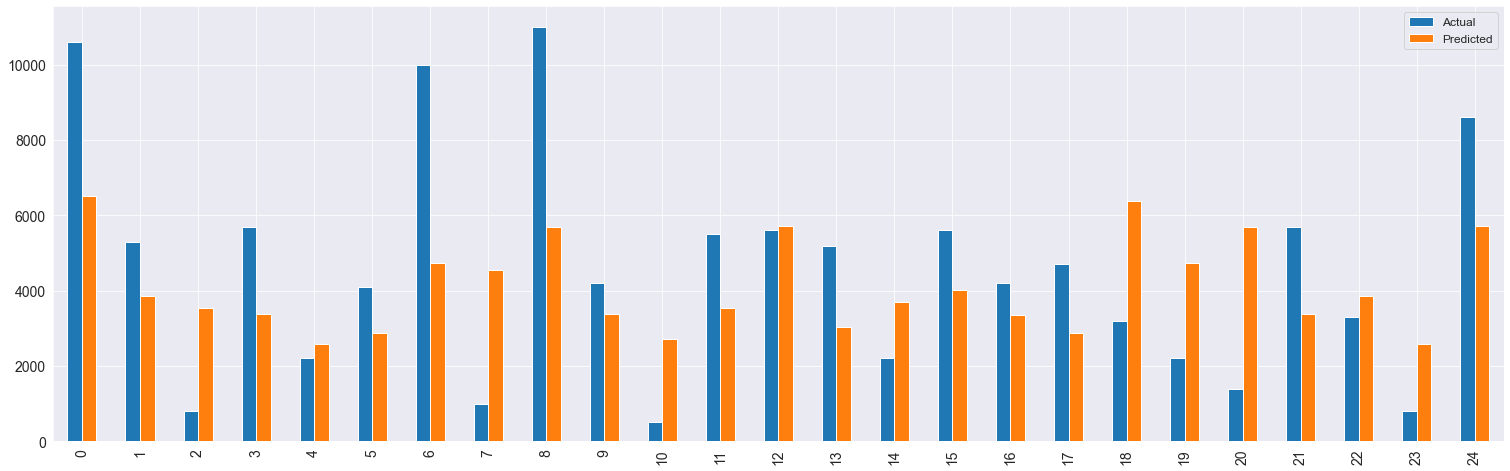

In [93]:
df_pred_plot.plot(kind='bar',figsize=(26,8))
plt.show()

In [87]:
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.15
